In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
raw = pd.read_csv('cps_00008.csv')

In [3]:
raw.loc[raw['OCCLY']==9260].describe()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,METAREA,PERNUM,CPSIDP,...,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
count,17.000000,17.000000,17.0,1.700000e+01,17.0,17.000000,17.000000,17.000000,17.000000,1.700000e+01,...,17.000000,17.000000,17.000000,17.0,17.000000,11.000000,17.000000,17.000000,17.000000,17.000000
mean,2017.058824,55312.294118,3.0,1.304737e+13,1.0,1713.131176,31.647059,6129.647059,1.647059,1.304737e+13,...,44.529412,1.176471,78.882353,9260.0,6151.764706,1829.727273,50502.176471,47141.176471,91.000000,1.764706
std,0.826936,30209.599500,0.0,9.932694e+12,0.0,952.740459,11.135199,3060.716786,0.996317,9.932694e+12,...,15.532698,0.392953,26.881412,0.0,1650.621986,152.333247,32130.347347,34740.665272,23.280893,5.031518
min,2016.000000,8089.000000,3.0,0.000000e+00,1.0,184.490000,12.000000,1001.000000,1.000000,0.000000e+00,...,23.000000,1.000000,10.000000,9260.0,770.000000,1539.000000,16719.000000,8400.000000,15.000000,0.000000
25%,2016.000000,45501.000000,3.0,0.000000e+00,1.0,1116.250000,31.000000,5001.000000,1.000000,0.000000e+00,...,34.000000,1.000000,73.000000,9260.0,6080.000000,1779.000000,27000.000000,20000.000000,99.000000,0.000000
50%,2017.000000,53791.000000,3.0,2.015121e+13,1.0,1824.950000,32.000000,5606.000000,1.000000,2.015121e+13,...,38.000000,1.000000,81.000000,9260.0,6180.000000,1779.000000,50250.000000,48000.000000,99.000000,0.000000
75%,2018.000000,84633.000000,3.0,2.017020e+13,1.0,2182.130000,42.000000,8640.000000,2.000000,2.017020e+13,...,56.000000,1.000000,92.000000,9260.0,6180.000000,2000.000000,60010.000000,60000.000000,99.000000,0.000000
max,2018.000000,93527.000000,3.0,2.018020e+13,1.0,3583.290000,42.000000,9998.000000,4.000000,2.018020e+13,...,76.000000,2.000000,123.000000,9260.0,9090.000000,2000.000000,148200.000000,148000.000000,99.000000,17.000000


In [5]:
raw.isnull().sum(axis = 0)


YEAR             0
SERIAL           0
MONTH            0
CPSID            0
ASECFLAG         0
ASECWTH          0
REGION           0
METAREA          0
PERNUM           0
CPSIDP           0
ASECWT           0
AGE              0
SEX              0
EDUC             0
OCCLY            0
INDLY            0
WKXPNS      180084
INCTOT           0
INCWAGE          0
MIGSTA1          0
WHYMOVE          0
dtype: int64

In [6]:
raw.columns

Index(['YEAR', 'SERIAL', 'MONTH', 'CPSID', 'ASECFLAG', 'ASECWTH', 'REGION',
       'METAREA', 'PERNUM', 'CPSIDP', 'ASECWT', 'AGE', 'SEX', 'EDUC', 'OCCLY',
       'INDLY', 'WKXPNS', 'INCTOT', 'INCWAGE', 'MIGSTA1', 'WHYMOVE'],
      dtype='object')

In [7]:
r2016 = raw.loc[raw['YEAR']==2016]
r2017 = raw.loc[raw['YEAR']==2017]
r2018 = raw.loc[raw['YEAR']==2018]

print(raw.shape)
raw.head()

(551485, 21)


,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,METAREA,PERNUM,CPSIDP,...,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
0,2016,2,3,20141202933700,1,1132.05,11,9998,1,20141202933701,...,79,2,30,0,0,9999.0,13309,0,99,0
1,2016,7,3,20151202935900,1,1077.54,11,9998,1,20151202935901,...,60,2,50,0,0,9999.0,11681,0,99,0
2,2016,7,3,20151202935900,1,1077.54,11,9998,2,20151202935902,...,59,1,81,0,0,9999.0,17615,0,99,0
3,2016,8,3,20160202937400,1,1151.49,11,9998,1,20160202937401,...,69,1,81,0,0,9999.0,24099,0,99,0
4,2016,9,3,20160102910900,1,705.00,11,9998,1,20160102910901,...,24,1,73,9140,6190,1471.0,6300,6000,99,0


In [8]:
raw_filtered = raw.loc[raw['INCTOT'] != 0]
raw_filtered = raw_filtered.loc[raw['INCTOT'] != 99999999.0]
raw_filtered = raw_filtered.loc[raw['INCTOT'] != 99999998.0]
raw_filtered = raw_filtered.loc[raw['AGE'] <=80]


In [9]:
raw2016_filtered = raw.loc[raw['INCTOT'] != 0]
raw2016_filtered = raw2016_filtered.loc[raw['INCTOT'] != 99999999.0]
raw2016_filtered = raw2016_filtered.loc[raw['INCTOT'] != 99999998.0]
raw2016_filtered = raw2016_filtered.loc[raw['AGE'] <=80]

In [10]:
raw_filtered.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,METAREA,PERNUM,CPSIDP,...,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
0,2016,2,3,20141202933700,1,1132.05,11,9998,1,20141202933701,...,79,2,30,0,0,9999.0,13309,0,99,0
1,2016,7,3,20151202935900,1,1077.54,11,9998,1,20151202935901,...,60,2,50,0,0,9999.0,11681,0,99,0
2,2016,7,3,20151202935900,1,1077.54,11,9998,2,20151202935902,...,59,1,81,0,0,9999.0,17615,0,99,0
3,2016,8,3,20160202937400,1,1151.49,11,9998,1,20160202937401,...,69,1,81,0,0,9999.0,24099,0,99,0
4,2016,9,3,20160102910900,1,705.00,11,9998,1,20160102910901,...,24,1,73,9140,6190,1471.0,6300,6000,99,0


In [250]:
raw_tech = raw_filtered.loc[raw_filtered['OCCLY'] >= 1000]
raw_tech = raw_tech.loc[raw_filtered['OCCLY'] <= 1107]

In [251]:
raw_tech

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,METAREA,PERNUM,CPSIDP,...,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
314,2016,321,3,20160102916200,1,1446.40,11,9998,2,20160102916202,...,52,2,111,1107,8190,1779.0,105616,70000,99,0
360,2016,349,3,20160102923400,1,1443.55,11,9998,1,20160102923401,...,57,2,111,1006,580,1779.0,69175,69000,99,0
400,2016,371,3,20160202938800,1,1313.19,11,9998,2,20160202938802,...,58,2,111,1050,7580,1711.0,94363,44000,99,0
439,2016,401,3,0,1,985.99,11,9998,1,0,...,42,2,111,1030,4570,1779.0,59025,59000,99,0
759,2016,578,3,0,1,572.44,11,4290,2,0,...,45,1,123,1107,6880,1779.0,120532,120000,99,0
891,2016,665,3,20160302962900,1,666.53,11,6401,3,20160302962904,...,18,1,81,1107,7380,411.0,3007,3000,99,0
1113,2016,791,3,0,1,646.40,11,6401,1,0,...,42,1,92,1006,6970,1779.0,53008,52500,99,0
1191,2016,838,3,20160202909100,1,1046.33,11,6401,1,20160202909101,...,60,1,91,1010,4870,1540.0,110006,110000,99,0
1203,2016,843,3,20150102908400,1,650.44,11,6401,1,20150102908401,...,34,1,81,1105,7870,1779.0,78932,62000,99,0
1453,2016,1089,3,20150104253700,1,476.23,11,9998,2,20150104253702,...,36,1,111,1020,3170,1779.0,77081,65000,99,0


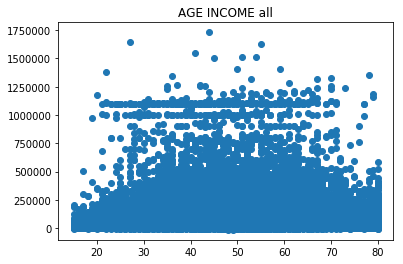

In [190]:
plt.scatter(raw_filtered['AGE'], raw_filtered['INCTOT'])
plt.title('AGE INCOME all')

plt.show()
#all age income for all 3 yrs

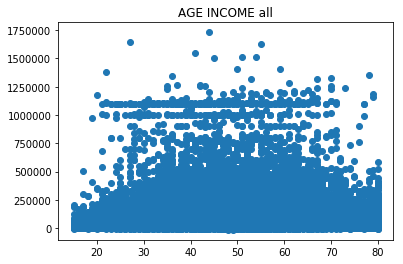

In [191]:
plt.scatter(raw2016_filtered['AGE'], raw2016_filtered['INCTOT'])
plt.title('AGE INCOME all')

plt.show()
#all age income 2016

In [192]:
def filt_metro(metarea, data):
    return data.loc[data['METAREA']==metarea]

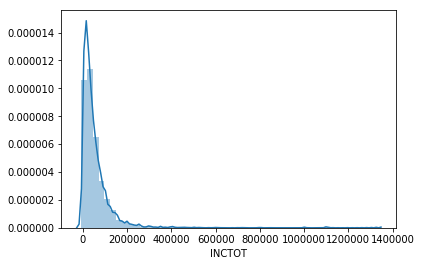

In [194]:
sns.distplot(filt_metro(5606, raw_filtered)['INCTOT']) #all occupation

y=237.98074269113496x+44179.446209894944


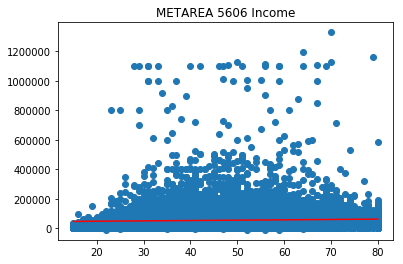

In [195]:
plt.scatter(filt_metro(5606, raw_filtered)['AGE'], filt_metro(5606, raw_filtered)['INCTOT'])
plt.title('METAREA 5606 Income')

m, b, r, p, std_err = stats.linregress(filt_metro(5606, raw_filtered)['AGE'], filt_metro(5606, raw_filtered)['INCTOT'])
x = np.linspace(15,80,100)
y = m*x+b
plt.plot(x, y, '-r')
print(f'y={m}x+{b}')

#all occupation in NYC area


In [196]:
f = 'INCTOT~AGE'
model = ols(formula=f, data=filt_metro(5606, raw_filtered)).fit()
model.summary()
#NYC area all occ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 INCTOT   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     36.90
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           1.27e-09
Time:                        14:49:50   Log-Likelihood:            -2.0065e+05
No. Observations:               15759   AIC:                         4.013e+05
Df Residuals:                   15757   BIC:                         4.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.418e+04   1928.974     22.903      0.000    4.04e+04     4.8e+04
AGE          237.9807     39.175      6.075      0.000     161.194     314.767
==============================================================================
Omnibus:                    19117.236   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2963428.481
Skew:                           6.517   Prob(JB):                         0.00
Kurtosis:                      68.903   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
filt_metro(5606, raw_tech).describe()
#tech NYC area

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,METAREA,PERNUM,CPSIDP,...,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
count,409.000000,409.000000,409.0,4.090000e+02,409.0,409.000000,409.0,409.0,409.000000,4.090000e+02,...,409.000000,409.000000,409.000000,409.000000,409.000000,292.000000,409.000000,409.000000,409.000000,409.000000
mean,2016.916870,10664.562347,3.0,1.232482e+13,1.0,2492.117995,12.0,5606.0,1.601467,1.232482e+13,...,41.156479,1.232274,109.699267,1040.877751,6886.728606,1791.232877,101330.349633,93075.652812,91.420538,0.938875
std,0.806186,1370.676910,0.0,9.841035e+12,0.0,882.904832,0.0,0.0,0.904833,9.841035e+12,...,12.222807,0.422800,15.633361,38.097974,1547.207436,312.213097,67826.404184,64146.149916,20.936860,2.865221
min,2016.000000,7756.000000,3.0,0.000000e+00,1.0,1463.120000,12.0,5606.0,1.000000,0.000000e+00,...,17.000000,1.000000,20.000000,1005.000000,570.000000,171.000000,500.000000,0.000000,9.000000,0.000000
25%,2016.000000,9484.000000,3.0,0.000000e+00,1.0,1880.020000,12.0,5606.0,1.000000,0.000000e+00,...,32.000000,1.000000,111.000000,1010.000000,6870.000000,1779.000000,60000.000000,55000.000000,99.000000,0.000000
50%,2017.000000,10970.000000,3.0,2.015120e+13,1.0,2176.710000,12.0,5606.0,1.000000,2.015120e+13,...,40.000000,1.000000,111.000000,1020.000000,7380.000000,1779.000000,86000.000000,80000.000000,99.000000,0.000000
75%,2018.000000,11897.000000,3.0,2.017010e+13,1.0,2815.050000,12.0,5606.0,2.000000,2.017010e+13,...,50.000000,1.000000,123.000000,1050.000000,7380.000000,2000.000000,126101.000000,120000.000000,99.000000,0.000000
max,2018.000000,12819.000000,3.0,2.018030e+13,1.0,5982.980000,12.0,5606.0,7.000000,2.018030e+13,...,80.000000,2.000000,125.000000,1107.000000,9590.000000,2000.000000,415366.000000,410000.000000,99.000000,17.000000


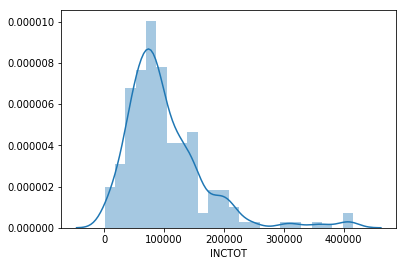

In [252]:
sns.distplot(filt_metro(5606, raw_tech)['INCTOT'])
#tech nyc 

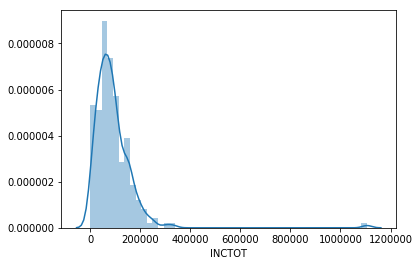

In [253]:
sns.distplot(filt_metro(4484, raw_tech)['INCTOT'])
#tech LA

In [202]:
raw_filtered.describe()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,REGION,METAREA,PERNUM,CPSIDP,...,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
count,366506.000000,366506.000000,366506.0,3.665060e+05,366506.0,366506.000000,366506.000000,366506.000000,366506.000000,3.665060e+05,...,366506.000000,366506.000000,366506.000000,366506.000000,366506.000000,246225.000000,3.665060e+05,3.665060e+05,366506.000000,366506.000000
mean,2016.993574,47907.225077,3.0,1.360366e+13,1.0,1784.821819,29.388015,5944.418498,1.715792,1.360366e+13,...,46.056968,1.507869,86.362810,3118.177206,4726.790475,3899.193798,4.653386e+04,3.606962e+04,92.634882,0.722073
std,0.814096,27478.220978,0.0,9.446463e+12,0.0,1091.203584,10.352502,3217.220791,1.003194,9.446463e+12,...,17.094314,0.499939,24.418379,2889.925265,3608.591704,3671.408067,6.590772e+04,6.195771e+04,20.858423,2.702351
min,2016.000000,2.000000,3.0,0.000000e+00,1.0,93.240000,11.000000,60.000000,1.000000,0.000000e+00,...,15.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-1.645800e+04,0.000000e+00,1.000000,0.000000
25%,2016.000000,23797.000000,3.0,0.000000e+00,1.0,871.647500,21.000000,3291.000000,1.000000,0.000000e+00,...,32.000000,1.000000,73.000000,0.000000,0.000000,1779.000000,1.406000e+04,0.000000e+00,99.000000,0.000000
50%,2017.000000,48054.000000,3.0,2.016010e+13,1.0,1705.440000,31.000000,5960.000000,1.000000,2.016010e+13,...,45.000000,2.000000,81.000000,3060.000000,6070.000000,2000.000000,3.020500e+04,2.200000e+04,99.000000,0.000000
75%,2018.000000,72277.000000,3.0,2.017011e+13,1.0,2340.540000,41.000000,9240.000000,2.000000,2.017011e+13,...,59.000000,2.000000,111.000000,4965.000000,7970.000000,9999.000000,5.817000e+04,5.000000e+04,99.000000,0.000000
max,2018.000000,95006.000000,3.0,2.018031e+13,1.0,9027.360000,42.000000,9998.000000,16.000000,2.018031e+13,...,80.000000,2.000000,125.000000,9840.000000,9890.000000,9999.000000,1.731899e+06,1.609999e+06,99.000000,19.000000


In [233]:
def var_frame(var, data):
    new = pd.concat([data['YEAR'],data[var],data['INCTOT']], ignore_index=True,axis=1)  
    new.columns = ['YEAR',var, 'INCTOT']
    return new

In [234]:
var_frame('EDUC', raw_filtered)

,YEAR,EDUC,INCTOT
0,2016,30,13309
1,2016,50,11681
2,2016,81,17615
3,2016,81,24099
4,2016,73,6300
6,2016,73,8796
8,2016,81,17786
9,2016,30,4561
10,2016,30,12841
11,2016,50,19930


In [244]:
def plotting(var, data):
    plt.scatter(data[var], data['INCTOT'])
    plt.show()
    sns.distplot(data[var])
    return plt.show()

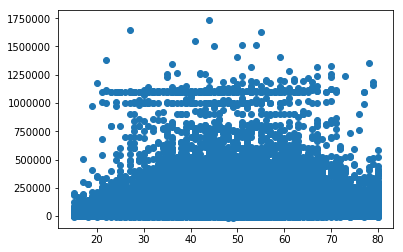

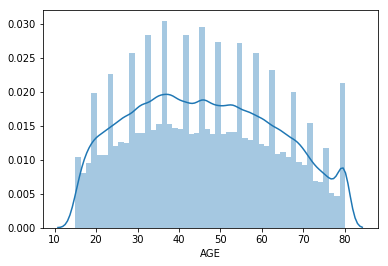

In [245]:
plotting('AGE', raw_filtered)

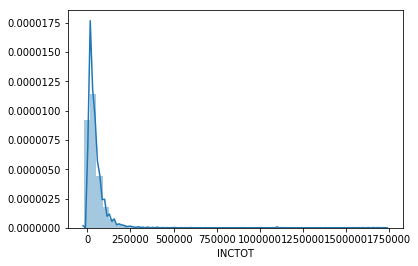

In [262]:
sns.distplot(raw_filtered['INCTOT'])

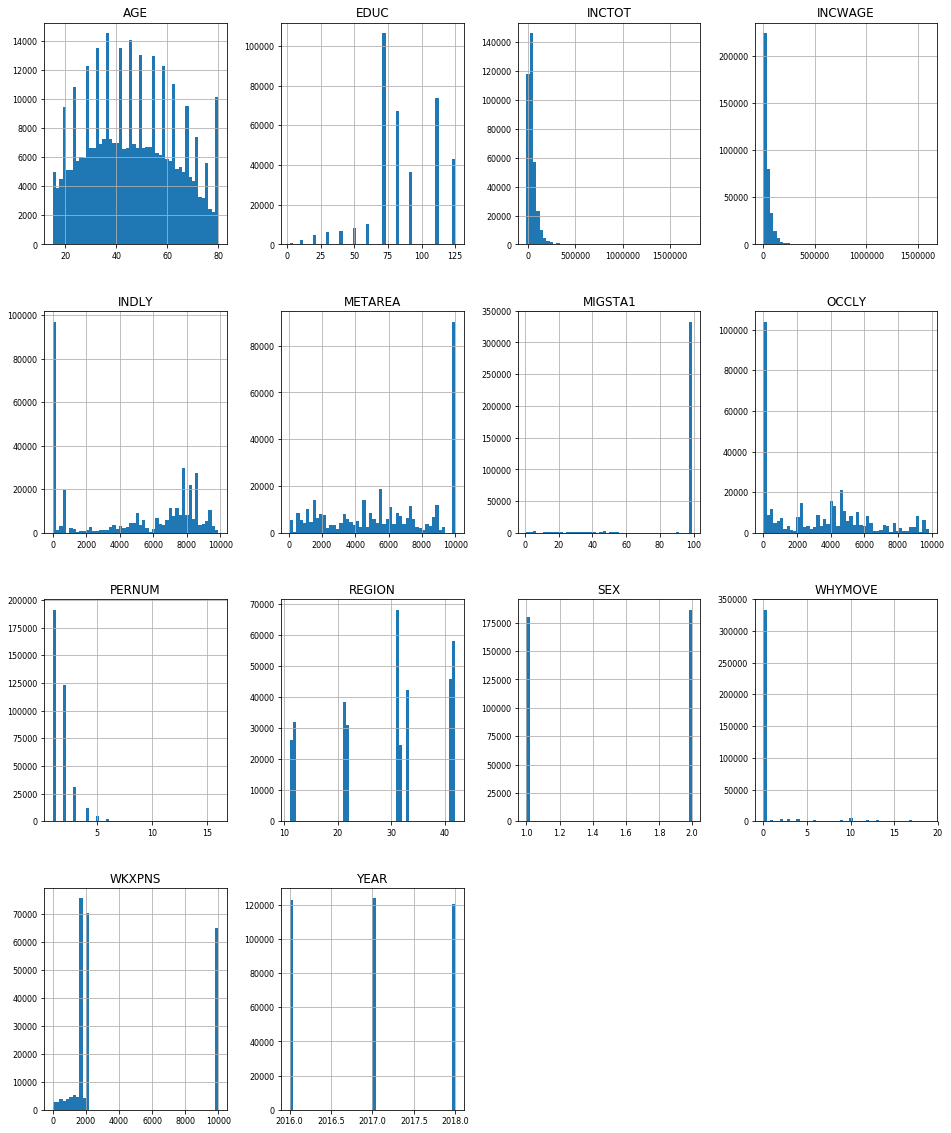

In [261]:
overview = raw_filtered.drop(['ASECFLAG', 'SERIAL', 'CPSID', 'ASECWT', 'ASECWTH', 'CPSIDP', 'MONTH', 'SERIAL'], axis =1)

overview.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [263]:
overview.corr()

,YEAR,REGION,METAREA,PERNUM,AGE,SEX,EDUC,OCCLY,INDLY,WKXPNS,INCTOT,INCWAGE,MIGSTA1,WHYMOVE
YEAR,1.000000,0.005367,-0.004366,0.002214,0.013943,0.000148,0.014556,-0.005368,-0.003442,0.020629,0.021626,0.014953,0.012116,-0.009332
REGION,0.005367,1.000000,0.114869,0.023690,-0.014183,-0.011351,-0.048228,0.009988,-0.010409,0.003281,-0.016688,-0.015832,-0.035103,0.018764
METAREA,-0.004366,0.114869,1.000000,-0.006567,0.027359,-0.003048,-0.053704,0.013330,-0.042955,0.025148,-0.034787,-0.041681,0.003176,-0.004113
PERNUM,0.002214,0.023690,-0.006567,1.000000,-0.289129,0.010242,-0.168227,0.087067,0.028102,0.007381,-0.121965,-0.085382,-0.001545,0.004288
AGE,0.013943,-0.014183,0.027359,-0.289129,1.000000,0.023593,0.033600,-0.294151,-0.328852,0.345768,0.068532,-0.050270,0.161212,-0.133460
SEX,0.000148,-0.011351,-0.003048,0.010242,0.023593,1.000000,0.046191,-0.168242,0.085775,0.090879,-0.164871,-0.141549,0.000320,-0.001604
EDUC,0.014556,-0.048228,-0.053704,-0.168227,0.033600,0.046191,1.000000,-0.175233,0.227699,-0.191168,0.308683,0.282274,-0.011222,0.005335
OCCLY,-0.005368,0.009988,0.013330,0.087067,-0.294151,-0.168242,-0.175233,1.000000,0.344970,-0.599373,-0.016071,0.062739,-0.047035,0.032610
INDLY,-0.003442,-0.010409,-0.042955,0.028102,-0.328852,0.085775,0.227699,0.344970,1.000000,-0.723731,0.163331,0.243955,-0.059481,0.040914
WKXPNS,0.020629,0.003281,0.025148,0.007381,0.345768,0.090879,-0.191168,-0.599373,-0.723731,1.000000,-0.228806,-0.322162,0.068222,-0.046066


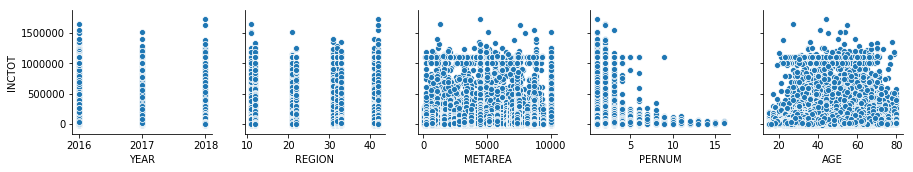

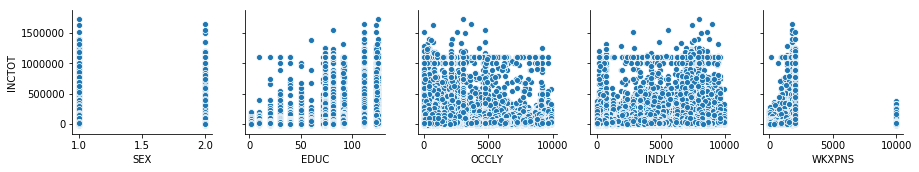

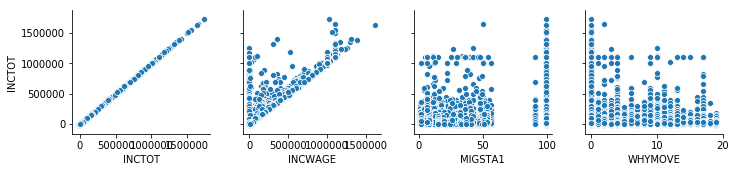

In [264]:
for i in range(0, len(overview.columns), 5):
    sns.pairplot(data=overview,
                x_vars=overview.columns[i:i+5],
                y_vars=['INCTOT'])

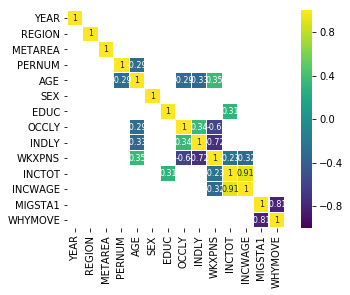

In [272]:
corr = overview.corr()
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);